## EJERCICIO DATOS IRIS

In [1]:
# Cargar los datos de la base iris
import seaborn as sns
iris = sns.load_dataset('iris')

### Análisis exploratorio de datos (EDA)

In [2]:
# Ver las primeras filas de la base
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Ver las últimas filas de la base
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [4]:
# Ver las características de las variables continuas
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Ver los tipos de variables y la cantidad de registros no nulos
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# Contar cuántas clases hay en species
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [7]:
# Contar los valores nulos por cada variable
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

##### Distribución de variables numéricas

In [10]:
# Cargar librerías
import seaborn as sns
import matplotlib.pyplot as plt

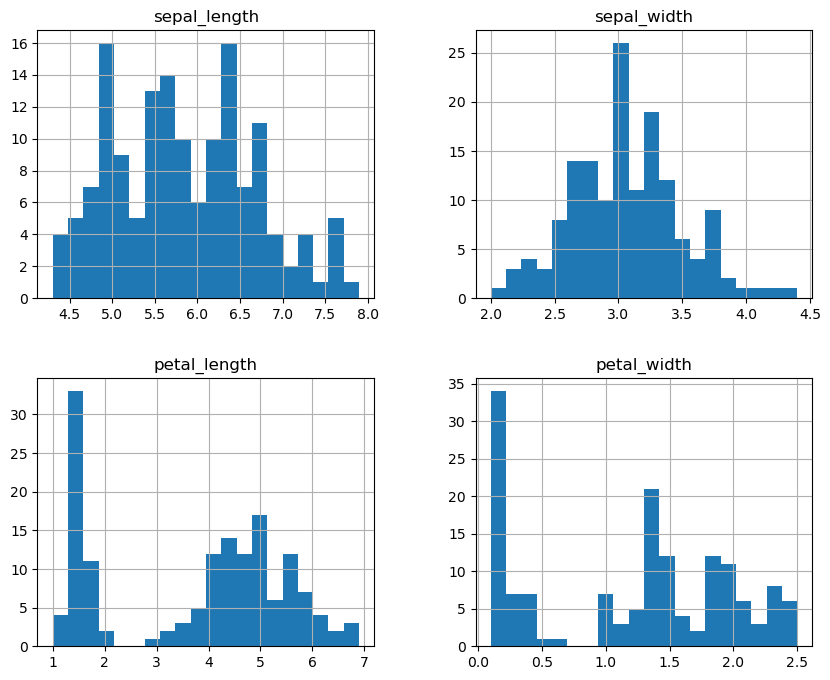

In [12]:
# Histogramas individuales
iris.hist(figsize=(10, 8), bins=20)
plt.show()

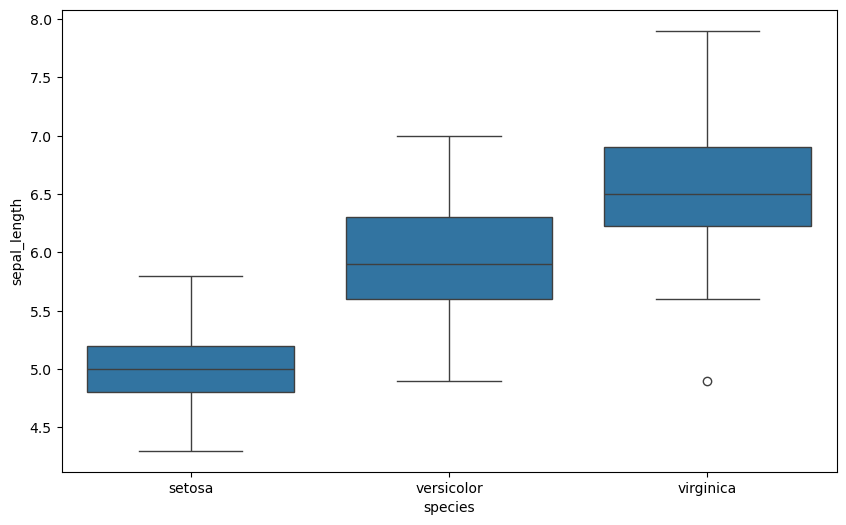

In [ ]:
# Boxplot para detectar outliers species y sepal_length
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris, x="species", y="sepal_length")
plt.show()

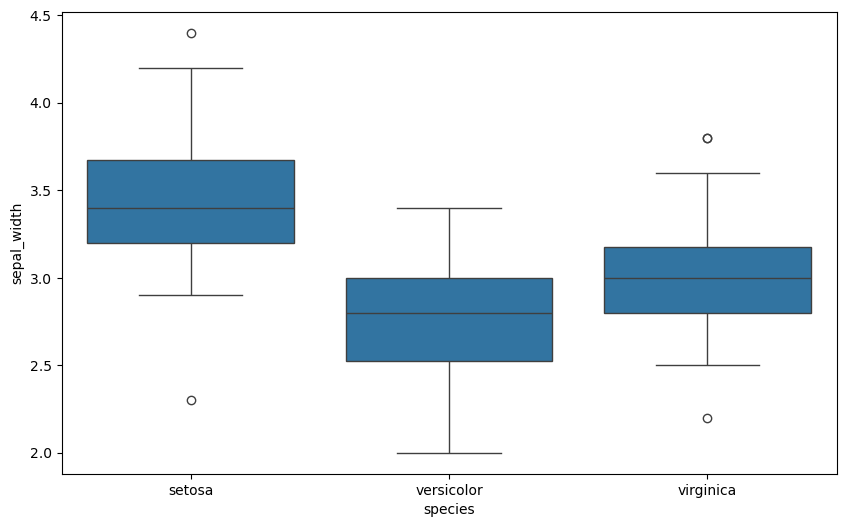

In [17]:
# Boxplot para detectar outliers species y sepal_width
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris, x="species", y="sepal_width")
plt.show()

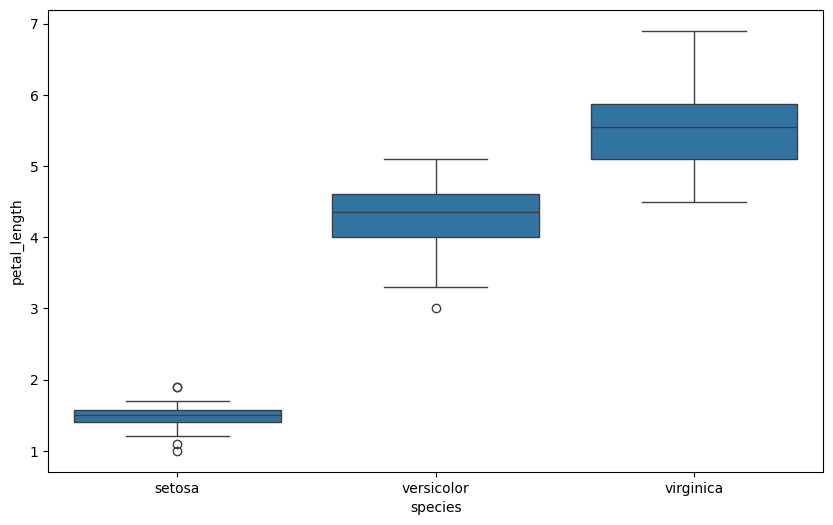

In [18]:
# Boxplot para detectar outliers species y petal_length
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris, x="species", y="petal_length")
plt.show()

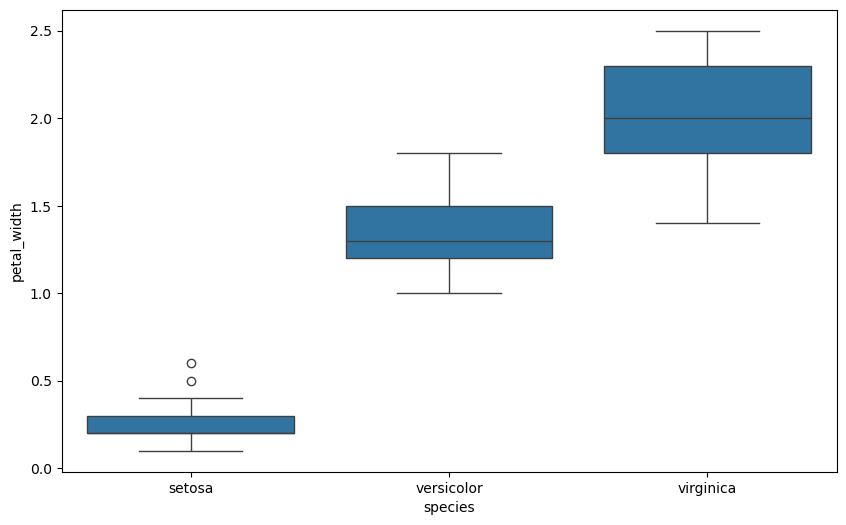

In [19]:
# Boxplot para detectar outliers species y petal_width
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris, x="species", y="petal_width")
plt.show()

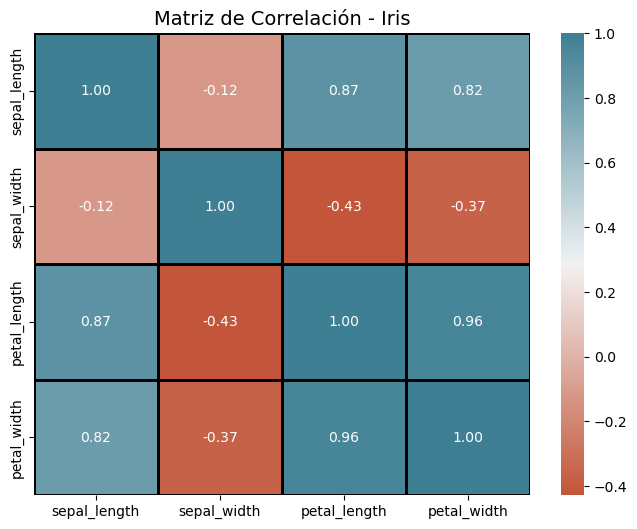

In [28]:
# Ver las correlaciones y matriz de calor
plt.figure(figsize=(8, 6))

sns.heatmap(iris.drop("species", axis=1).corr(), 
            annot=True, 
            cmap=sns.diverging_palette(20, 220, n=200), 
            fmt=".2f", 
            linewidths=1, 
            linecolor="black")

plt.title("Matriz de Correlación - Iris", fontsize=14)
plt.show()

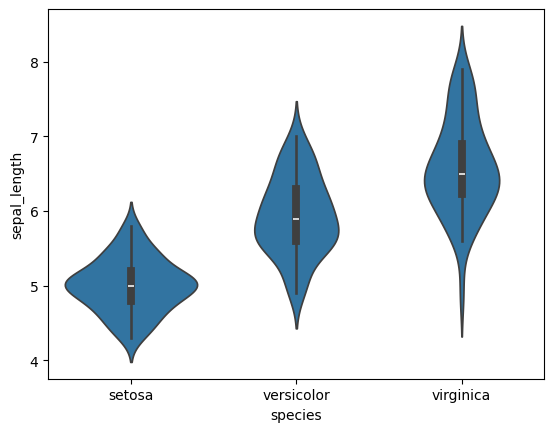

In [29]:
# Analizar la relación entre variables species y sepal_length
sns.violinplot(data=iris, x="species", y="sepal_length")
plt.show()

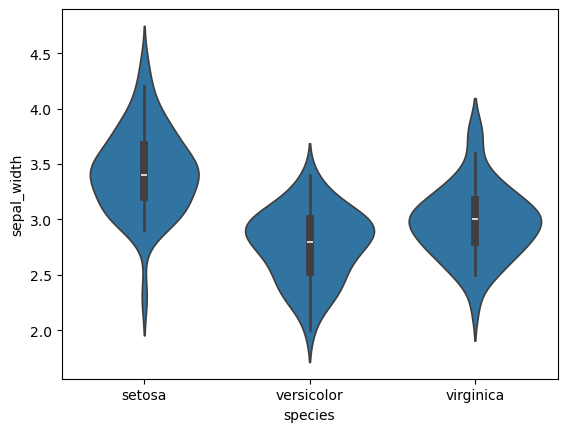

In [30]:
# Analizar la relación entre variables species y sepal_width
sns.violinplot(data=iris, x="species", y="sepal_width")
plt.show()

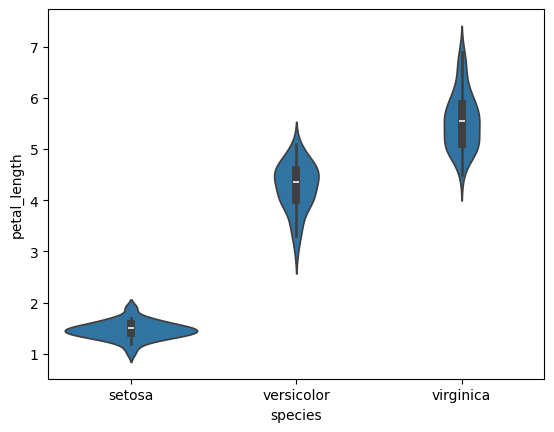

In [31]:
# Analizar la relación entre variables species y petal_length
sns.violinplot(data=iris, x="species", y="petal_length")
plt.show()

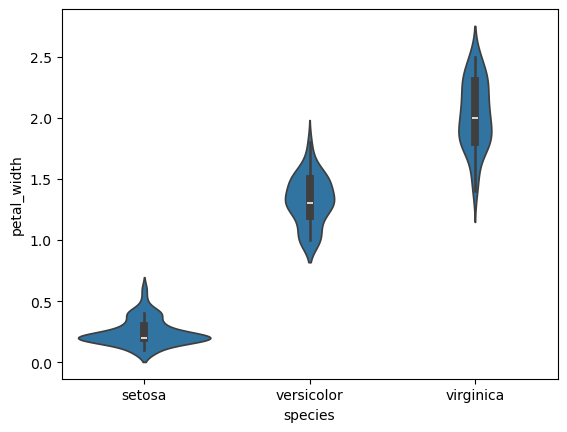

In [32]:
# Analizar la relación entre variables species y petal_width
sns.violinplot(data=iris, x="species", y="petal_width")
plt.show()

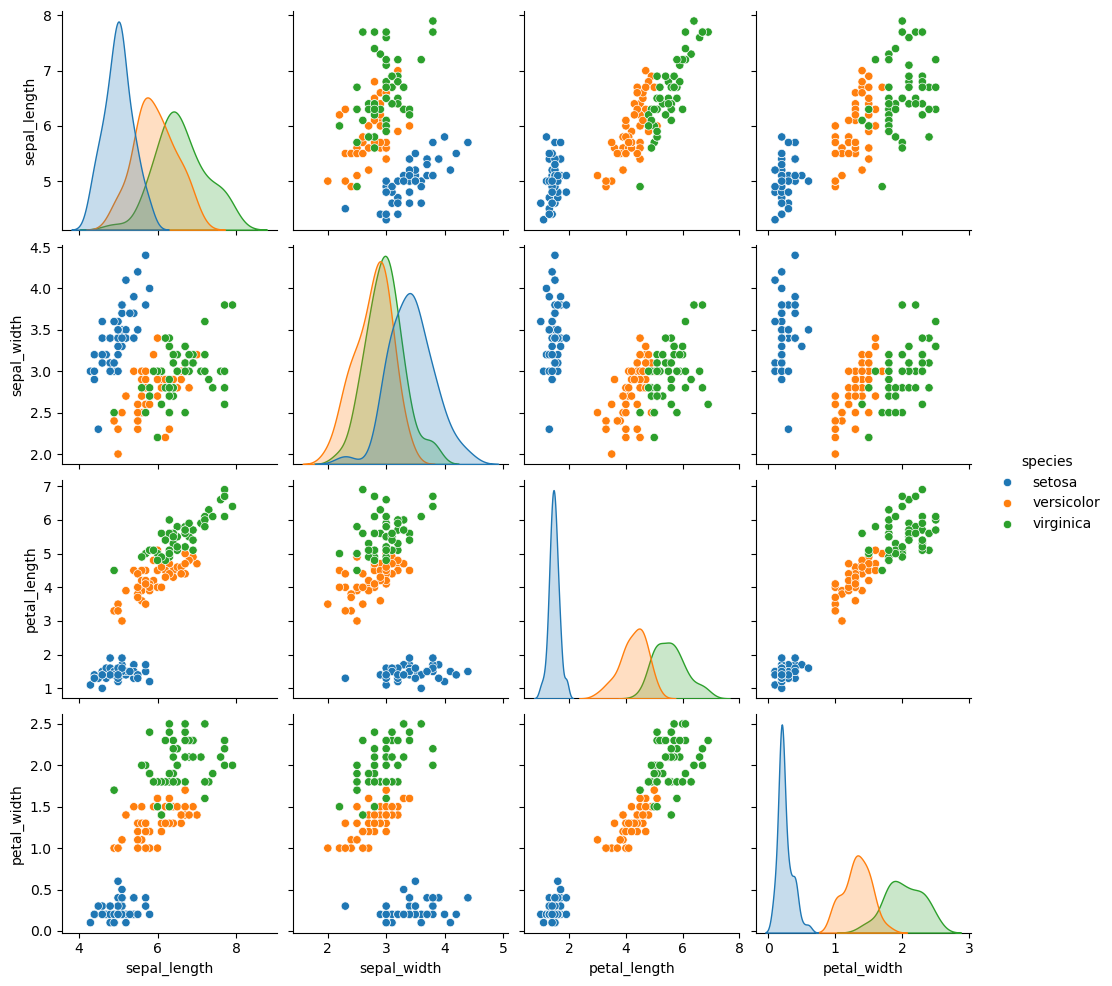

In [34]:
# Matriz de gráficos de dispersión
sns.pairplot(iris, hue="species", diag_kind="kde")  
plt.show()

#### Separar variables X y Y

In [35]:
# Crear conjunto de datos X
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [36]:
# Crear conjunto de datos Y
y_iris = iris['species']
y_iris.shape

(150,)

In [37]:
# Dividir en Xtrain, Xtest, ytrain, ytest
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
random_state=1)

In [38]:
# Ver las dimensiones de Xtrain
Xtrain.shape

(112, 4)

In [39]:
# Ver las dimensiones de Xtest
Xtest.shape

(38, 4)

In [40]:
# Ver las dimensiones de ytrain
ytrain.shape

(112,)

In [41]:
# Ver las dimensiones de ytest
ytest.shape

(38,)

### Modelo Naive Bayes

In [42]:
# Importar librería 
from sklearn.naive_bayes import GaussianNB

In [43]:
# 1. Escoger la clase de modelo
model = GaussianNB()

In [44]:
# 2. Instanciación del modelo
model.fit(Xtrain, ytrain)

GaussianNB()

In [45]:
# 3. Ajustar (fit) el modelo a los datos
y_model = model.predict(Xtest)

In [46]:
# Ver el accuracy del modelo (qué tan preciso es)
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

El clasificador de Naïve Bayes es efectivo en un 97% para este dataset.